In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import time

In [40]:
def get_xycoords_for_plotting(vframe, number_of_markers_or_joints, _3d):
    xcoords = []
    ycoords = []
    zcoords = []
    for n, i in enumerate(vframe):
        xcol = []
        ycol = []
        zcol = []
        for j in range(0,number_of_markers_or_joints):
            xcol.append(i[j][0])
            ycol.append(i[j][1])
            if _3d == '3d' :
                zcol.append(i[j][2])
        xcoords.append(xcol)
        ycoords.append(ycol)
        if _3d == '3d' :
            zcoords.append(zcol)
    return xcoords, ycoords, zcoords

In [4]:
def get_joint_connections():
    jt_connections = [
        (0, 16), (0, 21), (0, 1),  # Hips to legs
        (16, 17), (17, 18), (18, 19), (19, 20), # Left leg
        (21, 22), (22, 23), (23, 24), (24, 25), # Right leg
        (1, 2), (2, 3), (3, 4), (4, 5), # Spine to Head
        (3, 6), (6, 7), (7, 8), (8, 9), (9, 10),# Left arm
        (3, 11), (11, 12), (12, 13), (13, 14), (14, 15),# Right arm
    ]
    return connections

In [61]:
def plot_frame(vframes, xcoords, ycoords, zcoords, idx, connections, marker):
    plt.scatter(xcoords[idx], ycoords[idx], c='red', marker='o', s=50)
    # Plot bones
    if marker != 'marker' :
        for start_idx, end_idx in connections:
            start_point = vframes[idx][start_idx]
            end_point = vframes[idx][end_idx]
            plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'b-')
    plt.title('2D Body Pose Estimation')
    plt.xlim(plt.xlim()[::-1])
    plt.ylim(plt.ylim()[::-1])
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box') # Maintain aspect ratio
    plt.show()

In [6]:
def load_video_frames(directory_path):
    
    vframes = []
    ffiles = []
    vextns = ['.npy']
    
    if not os.path.isdir(directory_path):
        print(f"Error: Directory not found at {directory_path}")
        return []

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            ffile, extension = os.path.splitext(filename)
            if extension.lower() in vextns:
                vframe = np.load(file_path)
                vframes.append(vframe)
                ffiles.append(ffile)
                
    return vframes, ffiles

In [7]:
ex1_vframes, ex1_ffiles = load_video_frames('2d_joints/Ex1')
ex2_vframes, ex2_ffiles = load_video_frames('2d_joints/Ex2')
ex3_vframes, ex3_ffiles = load_video_frames('2d_joints/Ex3')
ex4_vframes, ex4_ffiles = load_video_frames('2d_joints/Ex4')
ex5_vframes, ex5_ffiles = load_video_frames('2d_joints/Ex5')
ex6_vframes, ex6_ffiles = load_video_frames('2d_joints/Ex6')

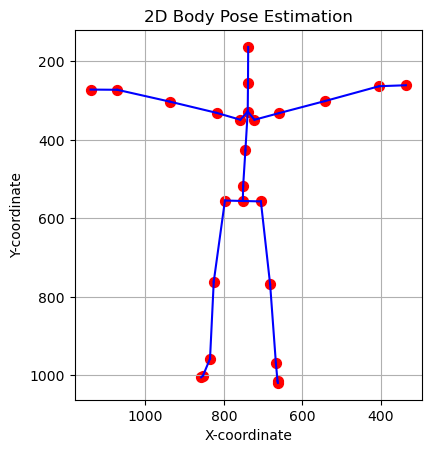

In [62]:
vframe = ex1_vframes[20]
xcoords, ycoords, zcoords = get_xycoords_for_plotting(vframe, 26, '2d')
connections = get_joint_connections()
plot_frame(vframe, xcoords, ycoords, zcoords, 1, connections, 'joint')

In [66]:
ex1_mkr_vframes, ex1_mkr_ffiles = load_video_frames('2d_markers/Ex1')
ex2_mkr_vframes, ex2_mkr_ffiles = load_video_frames('2d_markers/Ex2')
ex3_mkr_vframes, ex3_mkr_ffiles = load_video_frames('2d_markers/Ex3')
ex4_mkr_vframes, ex4_mkr_ffiles = load_video_frames('2d_markers/Ex4')
ex5_mkr_vframes, ex5_mkr_ffiles = load_video_frames('2d_markers/Ex5')
ex6_mkr_vframes, ex6_mkr_ffiles = load_video_frames('2d_markers/Ex6')

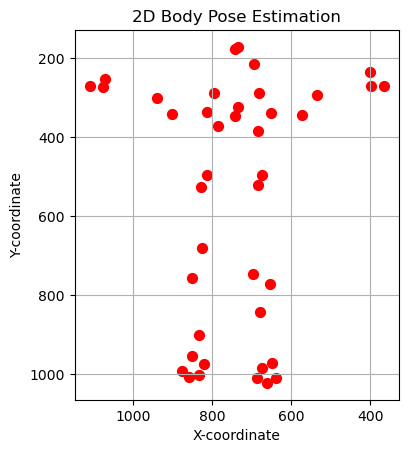

In [63]:
vframe = ex1_mkr_vframes[20]
xcoords, ycoords, zcoords = get_xycoords_for_plotting(vframe, 41, '2d')
connections = get_joint_connections()
plot_frame(vframe, xcoords, ycoords, zcoords, 1, connections, 'marker')

In [31]:
ex1_3d_vframes, ex1_3d_ffiles = load_video_frames('3d_joints/Ex1')
ex2_3d_vframes, ex2_3d_ffiles = load_video_frames('3d_joints/Ex2')
ex3_3d_vframes, ex3_3d_ffiles = load_video_frames('3d_joints/Ex3')
ex4_3d_vframes, ex4_3d_ffiles = load_video_frames('3d_joints/Ex4')
ex5_3d_vframes, ex5_3d_ffiles = load_video_frames('3d_joints/Ex5')
ex6_3d_vframes, ex6_3d_ffiles = load_video_frames('3d_joints/Ex6')

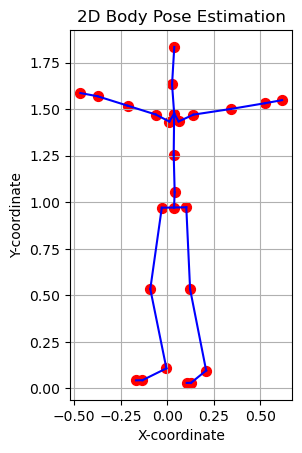

In [60]:
v3dframe = ex1_3d_vframes[20]
xcoords, ycoords, zcoords = get_xycoords_for_plotting(v3dframe, 26, '3d')
connections = get_joint_connections()
plot_frame(v3dframe, xcoords, ycoords, zcoords, 1, connections, 'joint')

In [65]:
ex1_mkr3d_vframes, ex1_mkr3d_ffiles = load_video_frames('3d_markers/Ex1')
ex2_mkr3d_vframes, ex2_mkr3d_ffiles = load_video_frames('3d_markers/Ex2')
ex3_mkr3d_vframes, ex3_mkr3d_ffiles = load_video_frames('3d_markers/Ex3')
ex4_mkr3d_vframes, ex4_mkr3d_ffiles = load_video_frames('3d_markers/Ex4')
ex5_mkr3d_vframes, ex5_mkr3d_ffiles = load_video_frames('3d_markers/Ex5')
ex6_mkr3d_vframes, ex6_mkr3d_ffiles = load_video_frames('3d_markers/Ex6')

In [75]:
v3dframe[1]

array([[ 0.036306  ,  0.97200602, -0.055456  ,  1.        ],
       [ 0.03974355,  1.05449506, -0.05972642,  1.        ],
       [ 0.03443309,  1.25553071, -0.05629792,  1.        ],
       [ 0.03697734,  1.47677267, -0.06057899,  1.        ],
       [ 0.025656  ,  1.63375617, -0.05321135,  1.        ],
       [ 0.03757137,  1.83502128, -0.05594164,  1.        ],
       [ 0.060998  ,  1.43445161, -0.02822857,  1.        ],
       [ 0.1403415 ,  1.47104427,  0.06657386,  1.        ],
       [ 0.34209903,  1.50166278,  0.28845156,  1.        ],
       [ 0.52541059,  1.53256225,  0.50907811,  1.        ],
       [ 0.61687353,  1.54895253,  0.6283907 ,  1.        ],
       [ 0.01131963,  1.43379386, -0.09174451,  1.        ],
       [-0.06195769,  1.4716722 , -0.19082822,  1.        ],
       [-0.21344958,  1.51943942, -0.44703479,  1.        ],
       [-0.37459881,  1.56993401, -0.6809476 ,  1.        ],
       [-0.4671367 ,  1.58719105, -0.79930527,  1.        ],
       [ 0.10211615,  0.

In [76]:
xcoords, ycoords, zcoords = get_xycoords_for_plotting(v3dframe, 26, '3d')

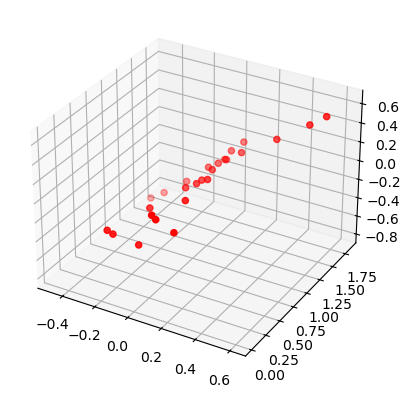

In [87]:
idx = 100
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xcoords[idx], ycoords[idx], zcoords[idx], marker='o', c='red')